In [ ]:
import os

data_dir = r"C:\Users\Shree\Downloads\data"
classes = os.listdir(data_dir)
print("Classes:", classes)  # Should output ['Blight', 'Gray spot', 'Rust', 'Healthy']


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\attar\\Documents\\data'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
img_size = (224, 224)
batch_size = 32

# Data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training and validation data generators
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 3352 images belonging to 4 classes.
Found 836 images belonging to 4 classes.


In [5]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten

# Load pre-trained VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(len(classes), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)


Epoch 1/10


C:\Users\attar\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


105/105 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - accuracy: 0.7205 - loss: 0.9167 - val_accuracy: 0.8923 - val_loss: 0.2916
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.9370 - loss: 0.1793 - val_accuracy: 0.8983 - val_loss: 0.2416
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.9590 - loss: 0.1132 - val_accuracy: 0.9211 - val_loss: 0.2121
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.9909 - loss: 0.0459 - val_accuracy: 0.8804 - val_loss: 0.3201
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.9865 - loss: 0.0459 - val_accuracy: 0.9282 - val_loss: 0.2222
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.9961 - loss: 0.0257 - val_accuracy: 0.9258 - val_loss: 0.2529
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.9997 - loss: 0.0113 - val_accuracy: 0.9211 - val_loss: 0.2610
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 249s 2s/step - accuracy: 0.9994 - loss: 0.0105 - val_accuracy: 0.923

In [7]:
import numpy as np  # Make sure numpy is imported

# Get a single image and label from the validation set
single_image, single_label = validation_generator[0]  # Choose the batch index as needed

# Choose the first image in the batch for testing
single_image = np.expand_dims(single_image[0], axis=0)

# Make the prediction
prediction = model.predict(single_image)
predicted_class = classes[np.argmax(prediction)]

# Display the prediction
print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
Predicted Class: Common_Rust


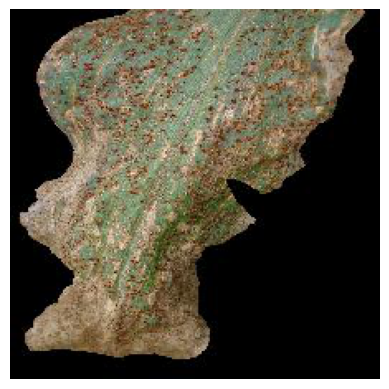

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels from the validation set
single_image, single_label = validation_generator[0]  # Choose the batch index as needed

# Choose the first image in the batch for testing
image_to_display = single_image[0]

# Rescale the image back to its original pixel range [0, 1] (optional, if needed)
image_to_display = np.clip(image_to_display, 0, 1)

# Display the image using matplotlib
plt.imshow(image_to_display)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()


In [12]:
import numpy as np  # Make sure numpy is imported

# Get a single image and label from the validation set
single_image, single_label = validation_generator[10]  # Choose the batch index as needed

# Choose the first image in the batch for testing
single_image = np.expand_dims(single_image[0], axis=0)

# Make the prediction
prediction = model.predict(single_image)
predicted_class = classes[np.argmax(prediction)]

# Display the prediction
print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted Class: Healthy


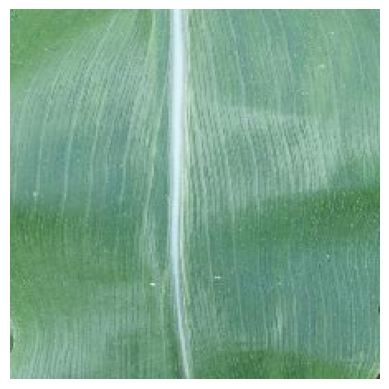

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels from the validation set
single_image, single_label = validation_generator[21]  # Choose the batch index as needed

# Choose the first image in the batch for testing
image_to_display = single_image[10]

# Rescale the image back to its original pixel range [0, 1] (optional, if needed)
image_to_display = np.clip(image_to_display, 0, 1)

# Display the image using matplotlib
plt.imshow(image_to_display)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()


In [14]:
# Save the model
model.save('maize_disease_model.h5')
print("Model saved as 'maize_disease_model.h5'")


Model saved as 'maize_disease_model.h5'
